In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
# Define the image to mask
path_to_folder = r'.\data_slices'
img_flair_name = '/BraTS20_Training_001_flair_60.png'
img_seg_name = '/BraTS20_Training_001_seg_60.png'

In [15]:
image_flair = cv2.imread(path_to_folder + img_flair_name, cv2.IMREAD_GRAYSCALE)
image_seg = cv2.imread(path_to_folder + img_seg_name, cv2.IMREAD_GRAYSCALE)

In [16]:
# mask manipulation
new_mask = image_seg.copy()
seuil = 125
for i in range (len(new_mask)):
    for j in range (len(new_mask[0])):
        if seuil < new_mask[i][j]:
            new_mask[i][j] = 0
        else:
            new_mask[i][j] = 255

masked = cv2.bitwise_and(image_flair, image_flair, mask=new_mask)

for i in range (len(masked)):
    for j in range (len(masked[0])):
        if masked[i][j]==0:
            masked[i][j] = 30

In [21]:
# Save the image
try:
   os.mkdir('./masked_tumors')
except:
    pass
plt.imsave('./masked_tumors'+img_flair_name, masked, cmap='gray')

# Example

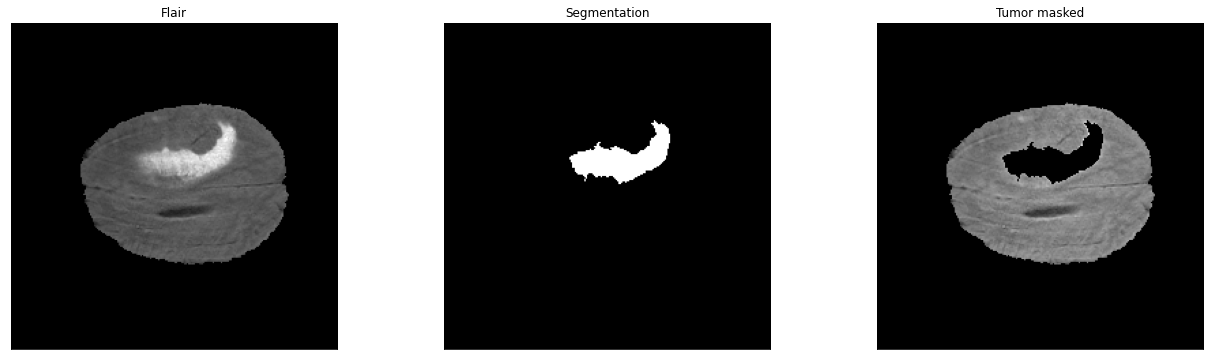

In [17]:
plt.figure(figsize=(22,6))
plt.subplot(131), plt.imshow(image_flair, cmap='gray'),plt.title('Flair')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_seg, cmap='gray'),plt.title('Segmentation')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(masked, cmap='gray'),plt.title('Tumor masked')
plt.xticks([]), plt.yticks([])
plt.show()